In [3]:
#Q1)
import numpy as np

def summation_unit(inputs, weights):
    return np.dot(inputs, weights)

def step_function(x):
    return 1 if x >= 0 else 0

def bipolar_step(x):
    return 1 if x >= 0 else -1

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return max(0, x)

def leaky_relu(x, alpha=0.01):
    return x if x > 0 else alpha * x

def calculate_error(y_true, y_pred):
    return 0.5 * (y_true - y_pred) ** 2

if __name__ == "__main__":
    inputs = np.array([1, 0.5, -1])
    weights = np.array([0.2, -0.4, 0.6])
    weighted_sum = summation_unit(inputs, weights)

    print("Summation Unit Output:", weighted_sum)
    print("Step Function Output:", step_function(weighted_sum))
    print("Bipolar Step Output:", bipolar_step(weighted_sum))
    print("Sigmoid Output:", sigmoid(weighted_sum))
    print("Tanh Output:", tanh(weighted_sum))
    print("ReLU Output:", relu(weighted_sum))
    print("Leaky ReLU Output:", leaky_relu(weighted_sum))
    print("Error Example (target=1, predicted=0.6):", calculate_error(1, 0.6))


Summation Unit Output: -0.6
Step Function Output: 0
Bipolar Step Output: -1
Sigmoid Output: 0.35434369377420455
Tanh Output: -0.5370495669980352
ReLU Output: 0
Leaky ReLU Output: -0.006
Error Example (target=1, predicted=0.6): 0.08000000000000002



Epoch 1
Input: [0 0], Predicted: 1, Error: -1, Updated Weights: [ 9.95  0.2  -0.75]
Input: [0 1], Predicted: 1, Error: -1, Updated Weights: [ 9.9  0.2 -0.8]
Input: [1 0], Predicted: 1, Error: -1, Updated Weights: [ 9.85  0.15 -0.8 ]
Input: [1 1], Predicted: 1, Error: 0, Updated Weights: [ 9.85  0.15 -0.8 ]
Total Epoch Error: 1.5

Epoch 2
Input: [0 0], Predicted: 1, Error: -1, Updated Weights: [ 9.8   0.15 -0.8 ]
Input: [0 1], Predicted: 1, Error: -1, Updated Weights: [ 9.75  0.15 -0.85]
Input: [1 0], Predicted: 1, Error: -1, Updated Weights: [ 9.7   0.1  -0.85]
Input: [1 1], Predicted: 1, Error: 0, Updated Weights: [ 9.7   0.1  -0.85]
Total Epoch Error: 1.5

Epoch 3
Input: [0 0], Predicted: 1, Error: -1, Updated Weights: [ 9.65  0.1  -0.85]
Input: [0 1], Predicted: 1, Error: -1, Updated Weights: [ 9.6  0.1 -0.9]
Input: [1 0], Predicted: 1, Error: -1, Updated Weights: [ 9.55  0.05 -0.9 ]
Input: [1 1], Predicted: 1, Error: 0, Updated Weights: [ 9.55  0.05 -0.9 ]
Total Epoch Error: 1.5



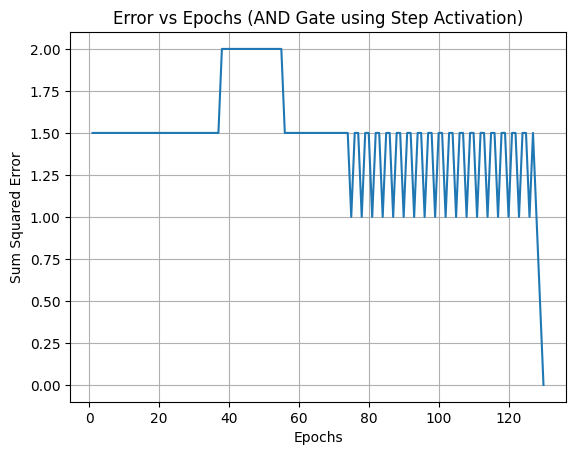

In [4]:
#Q2)
import matplotlib.pyplot as plt

def perceptron_train(X, y, weights, learning_rate, activation_func, max_epochs=1000, error_threshold=0.002):
    errors_per_epoch = []
    for epoch in range(max_epochs):
        total_error = 0
        print(f"\nEpoch {epoch + 1}")
        for i in range(len(X)):
            x_input = np.insert(X[i], 0, 1)
            weighted_sum = summation_unit(x_input, weights)
            output = activation_func(weighted_sum)
            error = y[i] - output
            weights += learning_rate * error * x_input
            total_error += calculate_error(y[i], output)
            print(f"Input: {X[i]}, Predicted: {output}, Error: {error}, Updated Weights: {weights}")
        errors_per_epoch.append(total_error)
        print(f"Total Epoch Error: {total_error}")
        if total_error <= error_threshold:
            print("\nConvergence achieved!")
            break
    return weights, errors_per_epoch, epoch + 1

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

weights = np.array([10.0, 0.2, -0.75])
learning_rate = 0.05

final_weights, errors, total_epochs = perceptron_train(X, y, weights, learning_rate, step_function)

print("\nFinal Weights after Training:", final_weights)
print("Total Epochs:", total_epochs)

plt.plot(range(1, total_epochs + 1), errors)
plt.xlabel('Epochs')
plt.ylabel('Sum Squared Error')
plt.title('Error vs Epochs (AND Gate using Step Activation)')
plt.grid(True)
plt.show()


In [5]:
#Q3)
activation_funcs = {
    "Bipolar Step": bipolar_step,
    "Sigmoid": sigmoid,
    "ReLU": relu
}

for name, func in activation_funcs.items():
    print(f"\n{name} Activation Function")
    weights = np.array([10.0, 0.2, -0.75])
    final_w, err_list, epoch = perceptron_train(X, y, weights, learning_rate, func)
    print(f"{name} Final Weights: {final_w}, Epochs: {epoch}")


Streaming output truncated to the last 5000 lines.
Input: [1 0], Predicted: 0.15215802029790873, Error: -0.15215802029790873, Updated Weights: [-4.76443342  3.03144293  3.01852339]
Input: [1 1], Predicted: 0.7833901273901235, Error: 0.21660987260987652, Updated Weights: [-4.75360293  3.04227343  3.02935389]
Total Epoch Error: 0.04654366800455757

Epoch 641
Input: [0 0], Predicted: 0.008546900608631166, Error: -0.008546900608631166, Updated Weights: [-4.75403027  3.04227343  3.02935389]
Input: [0 1], Predicted: 0.15126979559125783, Error: -0.15126979559125783, Updated Weights: [-4.76159376  3.04227343  3.0217904 ]
Input: [1 0], Predicted: 0.15195872948131792, Error: -0.15195872948131792, Updated Weights: [-4.7691917   3.03467549  3.0217904 ]
Input: [1 1], Predicted: 0.7836854600143875, Error: 0.21631453998561245, Updated Weights: [-4.75837597  3.04549122  3.03260612]
Total Epoch Error: 0.04641951812149912

Epoch 642
Input: [0 0], Predicted: 0.008506549271918101, Error: -0.00850654927191


Learning Rate: 0.1

Epoch 1
Input: [0 0], Predicted: 1, Error: -1, Updated Weights: [ 9.9   0.2  -0.75]
Input: [0 1], Predicted: 1, Error: -1, Updated Weights: [ 9.8   0.2  -0.85]
Input: [1 0], Predicted: 1, Error: -1, Updated Weights: [ 9.7   0.1  -0.85]
Input: [1 1], Predicted: 1, Error: 0, Updated Weights: [ 9.7   0.1  -0.85]
Total Epoch Error: 1.5

Epoch 2
Input: [0 0], Predicted: 1, Error: -1, Updated Weights: [ 9.6   0.1  -0.85]
Input: [0 1], Predicted: 1, Error: -1, Updated Weights: [ 9.5   0.1  -0.95]
Input: [1 0], Predicted: 1, Error: -1, Updated Weights: [ 9.4   0.   -0.95]
Input: [1 1], Predicted: 1, Error: 0, Updated Weights: [ 9.4   0.   -0.95]
Total Epoch Error: 1.5

Epoch 3
Input: [0 0], Predicted: 1, Error: -1, Updated Weights: [ 9.3   0.   -0.95]
Input: [0 1], Predicted: 1, Error: -1, Updated Weights: [ 9.2   0.   -1.05]
Input: [1 0], Predicted: 1, Error: -1, Updated Weights: [ 9.1  -0.1  -1.05]
Input: [1 1], Predicted: 1, Error: 0, Updated Weights: [ 9.1  -0.1  -1.05

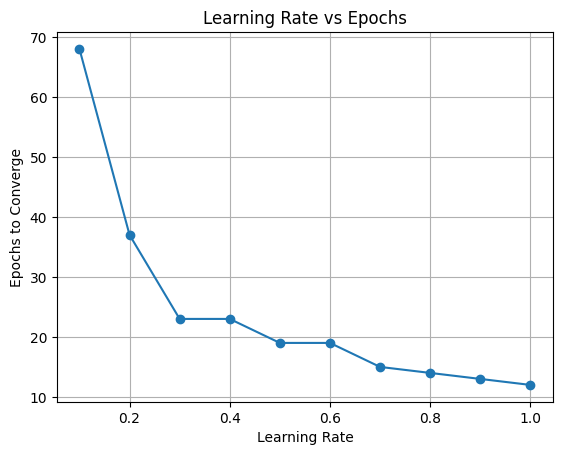

In [6]:
#Q4)
rates = np.arange(0.1, 1.1, 0.1)
epochs_list = []

for lr in rates:
    print(f"\nLearning Rate: {lr}")
    weights = np.array([10.0, 0.2, -0.75])
    _, _, epoch = perceptron_train(X, y, weights, lr, step_function)
    epochs_list.append(epoch)

plt.plot(rates, epochs_list, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Epochs to Converge')
plt.title('Learning Rate vs Epochs')
plt.grid(True)
plt.show()


In [7]:
#Q5)
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])
weights = np.array([10.0, 0.2, -0.75])

print("\nXOR with Step Function:")
_, err, ep = perceptron_train(X_xor, y_xor, weights, learning_rate, step_function)
print("Epochs:", ep)


Streaming output truncated to the last 5000 lines.
Total Epoch Error: 2.0

Epoch 287
Input: [0 0], Predicted: 1, Error: -1, Updated Weights: [ 0.05 -0.1  -0.1 ]
Input: [0 1], Predicted: 0, Error: 1, Updated Weights: [ 0.1  -0.1  -0.05]
Input: [1 0], Predicted: 0, Error: 1, Updated Weights: [ 0.15 -0.05 -0.05]
Input: [1 1], Predicted: 1, Error: -1, Updated Weights: [ 0.1 -0.1 -0.1]
Total Epoch Error: 2.0

Epoch 288
Input: [0 0], Predicted: 1, Error: -1, Updated Weights: [ 0.05 -0.1  -0.1 ]
Input: [0 1], Predicted: 0, Error: 1, Updated Weights: [ 0.1  -0.1  -0.05]
Input: [1 0], Predicted: 0, Error: 1, Updated Weights: [ 0.15 -0.05 -0.05]
Input: [1 1], Predicted: 1, Error: -1, Updated Weights: [ 0.1 -0.1 -0.1]
Total Epoch Error: 2.0

Epoch 289
Input: [0 0], Predicted: 1, Error: -1, Updated Weights: [ 0.05 -0.1  -0.1 ]
Input: [0 1], Predicted: 0, Error: 1, Updated Weights: [ 0.1  -0.1  -0.05]
Input: [1 0], Predicted: 0, Error: 1, Updated Weights: [ 0.15 -0.05 -0.05]
Input: [1 1], Predicted

In [8]:
#Q6)
X_cust = np.array([
    [20, 6, 2], [16, 3, 6], [27, 6, 2], [19, 1, 2], [24, 4, 2],
    [22, 1, 5], [15, 4, 2], [18, 4, 2], [21, 1, 4], [16, 2, 4]
])
y_cust = np.array([1,1,1,0,1,0,1,1,0,0])
weights = np.random.rand(4)
print("\nCustomer Data using Sigmoid:")
_, err, ep = perceptron_train(X_cust, y_cust, weights, 0.01, sigmoid)
print("Epochs:", ep)


Streaming output truncated to the last 5000 lines.
Input: [24  4  2], Predicted: 0.9290312275383988, Error: 0.07096877246160116, Updated Weights: [ 0.27111819 -0.54003687  4.01824991 -0.19382355]
Input: [22  1  5], Predicted: 0.0001914752149509762, Error: -0.0001914752149509762, Updated Weights: [ 0.27111628 -0.54007899  4.018248   -0.19383312]
Input: [15  4  2], Predicted: 0.9996124419065952, Error: 0.0003875580934048495, Updated Weights: [ 0.27112015 -0.54002086  4.0182635  -0.19382537]
Input: [18  4  2], Predicted: 0.9980464429895578, Error: 0.0019535570104421973, Updated Weights: [ 0.27113969 -0.53966922  4.01834164 -0.1937863 ]
Input: [21  1  4], Predicted: 0.00040197547781529156, Error: -0.00040197547781529156, Updated Weights: [ 0.27113567 -0.53975363  4.01833762 -0.19380238]
Input: [16  2  4], Predicted: 0.24909277238990996, Error: -0.24909277238990996, Updated Weights: [ 0.26864474 -0.57960847  4.01335577 -0.20376609]
Total Epoch Error: 0.043414654684128494

Epoch 617
Input: [

In [9]:
#Q7)
X_bias = np.hstack((np.ones((X_cust.shape[0], 1)), X_cust))
pseudo_inv = np.linalg.pinv(X_bias)
w_pinv = pseudo_inv.dot(y_cust)
pred = sigmoid(X_bias @ w_pinv)
print("\nPseudo-inverse Weights:", w_pinv)
print("Predicted Values:", pred.round())



Pseudo-inverse Weights: [ 0.1139903  -0.02342675  0.2607237   0.03727212]
Predicted Values: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [10]:
#Q8)
def sigmoid_deriv(x):
    s = sigmoid(x)
    return s * (1 - s)

def backpropagation_AND(X, y, epochs=1000, lr=0.05):
    np.random.seed(1)
    input_size = 2
    hidden_size = 2
    output_size = 1

    W1 = np.random.randn(input_size, hidden_size)
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size)
    b2 = np.zeros((1, output_size))

    for epoch in range(epochs):
        z1 = X @ W1 + b1
        a1 = sigmoid(z1)
        z2 = a1 @ W2 + b2
        a2 = sigmoid(z2)

        error = y.reshape(-1,1) - a2
        loss = np.mean(error ** 2)

        if loss < 0.002:
            print(f"Converged at Epoch {epoch}")
            break

        dz2 = error * sigmoid_deriv(z2)
        dW2 = a1.T @ dz2
        db2 = np.sum(dz2, axis=0)

        dz1 = dz2 @ W2.T * sigmoid_deriv(z1)
        dW1 = X.T @ dz1
        db1 = np.sum(dz1, axis=0)

        W2 += lr * dW2
        b2 += lr * db2
        W1 += lr * dW1
        b1 += lr * db1
    print("Final Loss:", loss)

backpropagation_AND(X, y)


Final Loss: 0.05994082265531683


In [11]:
#Q9)
backpropagation_AND(X_xor, y_xor)


Final Loss: 0.22571131892665525


In [12]:
#Q10)
y_dual = np.array([[1,0],[1,0],[1,0],[0,1]])

def one_hot_output_perceptron(X, y_dual, weights, lr, activation):
    for epoch in range(1000):
        total_err = 0
        for i in range(len(X)):
            x = np.insert(X[i], 0, 1)
            outputs = []
            for j in range(2):
                y_pred = activation(np.dot(x, weights[j]))
                error = y_dual[i][j] - y_pred
                weights[j] += lr * error * x
                total_err += error ** 2
        if total_err <= 0.002:
            print("Converged at Epoch:", epoch)
            break
    return weights

weights = [np.array([10.0, 0.2, -0.75]), np.array([10.0, 0.2, -0.75])]
one_hot_output_perceptron(X, y_dual, weights, 0.05, step_function)


Converged at Epoch: 129


[array([ 6.85, -2.95, -3.9 ]), array([-0.1 ,  0.1 ,  0.05])]

In [13]:
#Q11)
from sklearn.neural_network import MLPClassifier

clf_and = MLPClassifier(hidden_layer_sizes=(), activation='logistic', max_iter=1000)
clf_and.fit(X, y)
print("AND Gate with MLPClassifier:", clf_and.predict(X))

clf_xor = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', max_iter=1000)
clf_xor.fit(X_xor, y_xor)
print("XOR Gate with MLPClassifier:", clf_xor.predict(X_xor))


AND Gate with MLPClassifier: [0 0 0 1]
XOR Gate with MLPClassifier: [0 0 0 0]


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [14]:
#Q12)
mlp = MLPClassifier(hidden_layer_sizes=(4,), activation='logistic', max_iter=1000)
mlp.fit(X_cust, y_cust)
print("Customer Predictions using MLPClassifier:", mlp.predict(X_cust))


Customer Predictions using MLPClassifier: [1 1 1 0 1 0 1 1 0 0]


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
